 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [33]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [34]:
# Reading whale returns
path = Path('./Resources/whale_returns.csv')
whale_df = pd.read_csv(path, parse_dates=True, infer_datetime_format=True, index_col='Date')
whale_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [35]:
# Count nulls
whale_df.isna().sum().sum()

4

In [36]:
# Drop nulls
whale_df.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [37]:
# Reading algorithmic returns
path = Path('./Resources/algo_returns.csv')
algo_df = pd.read_csv(path, parse_dates=True, infer_datetime_format=True, index_col='Date')
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [38]:
# Count nulls
algo_df.isna().sum().sum()

6

In [39]:
# Drop nulls
algo_df.dropna()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [40]:
# Reading S&P 500 Closing Prices
path = Path('./Resources/sp500_history.csv')
sp500_df = pd.read_csv(path, parse_dates=True, infer_datetime_format=True, index_col='Date')
sp500_df = sp500_df.sort_index(ascending=True)
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [41]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [42]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')
sp500_df['Close'] = sp500_df['Close'].astype(float)

C:\Users\mattr\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [43]:
# Calculate Daily Returns
sp500_df['Close'] = sp500_df['Close'].pct_change()
sp500_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [44]:
# Drop nulls
sp500_df = sp500_df.dropna()

In [45]:
# Rename `Close` Column to be specific to this portfolio.
sp500_df = sp500_df.rename(columns={'Close': 'SP500'})

## Combine Whale, Algorithmic, and S&P 500 Returns

In [46]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
comb_df = pd.concat([whale_df, algo_df, sp500_df], axis='columns', join='inner')
comb_df.dropna()
comb_df.sort_index(ascending=False)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
...,...,...,...,...,...,...,...
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

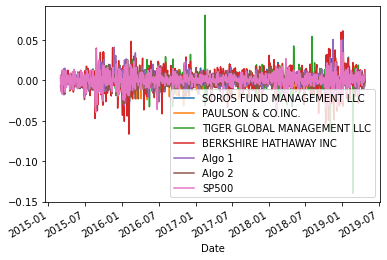

In [47]:
# Plot daily returns of all portfolios
comb_df.plot()


#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

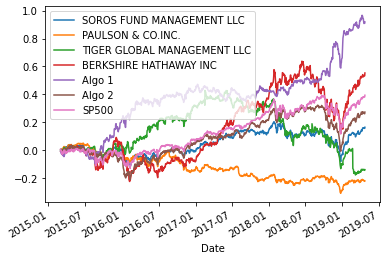

In [48]:
# Calculate cumulative returns of all portfolios
cum_returns = (1 + comb_df).cumprod() - 1

# Plot cumulative returns
cum_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

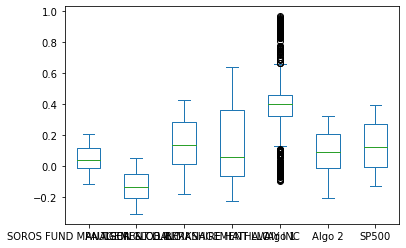

In [49]:
# Box plot to visually show risk
cum_returns.plot(kind='box')

### Calculate Standard Deviations

In [50]:
# Calculate the daily standard deviations of all portfolios
comb_df.std()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007621
Algo 2                         0.008339
SP500                          0.008551
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [51]:
# Calculate  the daily standard deviation of S&P 500

# Determine which portfolios are riskier than the S&P 500
Berkshire, Tiger Global

SyntaxError: invalid syntax (Temp/ipykernel_11676/2984336554.py, line 4)

### Calculate the Annualized Standard Deviation

In [52]:
# Calculate the annualized standard deviation (252 trading days)
annualized = comb_df.std() * 252
annualized

SOROS FUND MANAGEMENT LLC      1.989634
PAULSON & CO.INC.              1.769816
TIGER GLOBAL MANAGEMENT LLC    2.745280
BERKSHIRE HATHAWAY INC         3.255492
Algo 1                         1.920602
Algo 2                         2.101370
SP500                          2.154978
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

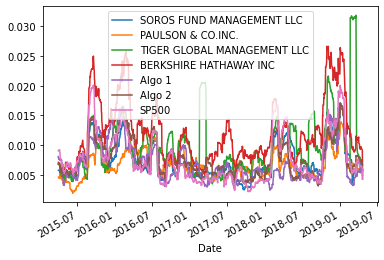

In [53]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
comb_df_21 = comb_df.rolling(21).std()

# Plot the rolling standard deviation
comb_df_21.plot()

### Calculate and plot the correlation

In [54]:
# Calculate the correlation
comb_df_corr = comb_df.corr()
# Display de correlation matrix
comb_df_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.287650,0.278505
Algo 2,0.826873,0.678152,0.507414,0.688082,0.287650,1.000000,0.858753
SP500,0.837864,0.669732,0.623946,0.751371,0.278505,0.858753,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

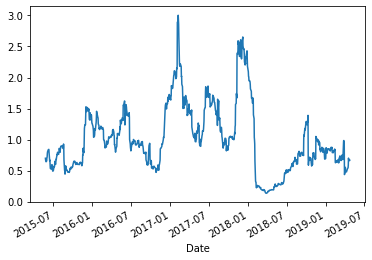

In [55]:
# Calculate covariance of a single portfolio
cov_algo_1 = comb_df['Algo 1'].rolling(60).cov()
# Calculate variance of S&P 500
sp500_var = comb_df['SP500'].rolling(60).var()
# Computing beta
beta = cov_algo_1 / sp500_var
# Plot beta trend
beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [56]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [57]:
# Annualized Sharpe Ratios
sharpe = comb_df.mean() / comb_df.std()
sharpe

SOROS FUND MANAGEMENT LLC      0.022452
PAULSON & CO.INC.             -0.030462
TIGER GLOBAL MANAGEMENT LLC   -0.007626
BERKSHIRE HATHAWAY INC         0.039170
Algo 1                         0.085724
Algo 2                         0.031934
SP500                          0.041495
dtype: float64

<AxesSubplot:>

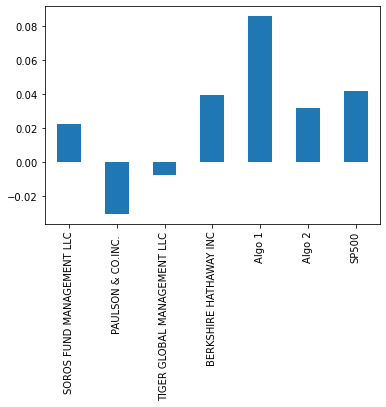

In [58]:
# Visualize the sharpe ratios as a bar plot
sharpe.plot(kind='bar')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

algo 1 outperforms

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [59]:
# Reading data from 1st stock
path_appl = Path('./Resources/aapl_returns.csv')
aapl_df = pd.read_csv(path_appl, parse_dates=True, infer_datetime_format=True, index_col='Date')
aapl_df = aapl_df.rename(columns={'Close': 'AAPL'})

In [60]:
# Reading data from 2nd stock
path_goog = Path('./Resources/goog_returns.csv')
goog_df = pd.read_csv(path_goog, parse_dates=True, infer_datetime_format=True, index_col='Date')
goog_df = goog_df.rename(columns={'Close': 'GOOG'})

In [61]:
# Reading data from 3rd stock
path_amd = Path('./Resources/amd_returns.csv')
amd_df = pd.read_csv(path_amd, parse_dates=True, infer_datetime_format=True, index_col='Date')
amd_df = amd_df.rename(columns={'Close': 'AMD'})

In [62]:
# Combine all stocks in a single DataFrame
comb_df_pers = pd.concat([aapl_df, goog_df, amd_df], join='inner', axis='columns')
comb_df_pers.head()

,AAPL,GOOG,AMD
Date,,,
2018-01-02 16:00:00,43.07,1065.00,10.98
2018-01-03 16:00:00,43.06,1082.48,11.55
2018-01-04 16:00:00,43.26,1086.40,12.12
2018-01-05 16:00:00,43.75,1102.23,11.88
2018-01-08 16:00:00,43.59,1106.94,12.28


In [63]:
# Reset Date index
comb_df_pers = comb_df_pers.reset_index()
comb_df_pers['Date'] = pd.to_datetime(comb_df_pers["Date"].dt.strftime('%Y-%m-%d'))
comb_df_pers.head()
comb_df_pers.set_index('Date', inplace=True)



In [64]:
# Reorganize portfolio data by having a column per symbol
comb_df_pers

,AAPL,GOOG,AMD
Date,,,
2018-01-02,43.07,1065.00,10.98
2018-01-03,43.06,1082.48,11.55
2018-01-04,43.26,1086.40,12.12
2018-01-05,43.75,1102.23,11.88
2018-01-08,43.59,1106.94,12.28
...,...,...,...
2018-12-24,36.71,976.22,16.65
2018-12-26,39.29,1039.46,17.90
2018-12-27,39.04,1043.88,17.49


In [86]:
# Calculate daily returns

comb_df_daily = comb_df_pers.pct_change()
# Drop NAs

# Display sample data
comb_df_daily.dropna(inplace=True)
comb_df_daily


,AAPL,GOOG,AMD
Date,,,
2018-01-03,-0.000232,0.016413,0.051913
2018-01-04,0.004645,0.003621,0.049351
2018-01-05,0.011327,0.014571,-0.019802
2018-01-08,-0.003657,0.004273,0.033670
2018-01-09,-0.000229,-0.000614,-0.037459
...,...,...,...
2018-12-24,-0.025743,-0.003389,-0.016539
2018-12-26,0.070281,0.064780,0.075075
2018-12-27,-0.006363,0.004252,-0.022905


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [84]:
# Set weights

weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_returns = comb_df_daily * weights
port_return = weighted_returns.sum(axis=1)

port_return_df = port_return.to_frame()
# Display sample data
port_return_df.rename(columns={0:'Personal'}, inplace=True)
port_return_df


,Personal
Date,
2018-01-03,0.022698
2018-01-04,0.019206
2018-01-05,0.002032
2018-01-08,0.011429
2018-01-09,-0.012768
...,...
2018-12-24,-0.015224
2018-12-26,0.070045
2018-12-27,-0.008339


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [70]:
# Join your returns DataFrame to the original returns DataFrame
new_comb = pd.concat([port_return_df, comb_df], join='inner', axis='columns')
new_comb


,Personal,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,,
2018-01-03,0.022698,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.006399
2018-01-04,0.019206,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.004029
2018-01-05,0.002032,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,0.007034
2018-01-08,0.011429,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,0.001662
2018-01-09,-0.012768,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.001303
...,...,...,...,...,...,...,...,...
2018-12-24,-0.015224,-0.019152,-0.011786,-0.029165,-0.020181,-0.003938,-0.014745,-0.027112
2018-12-26,0.070045,0.042977,0.029338,0.030958,0.059909,0.022750,0.030822,0.049594
2018-12-27,-0.008339,0.004184,-0.007472,0.009149,0.004813,0.001571,0.000494,0.008563


In [77]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
new_comb = new_comb.dropna()
new_comb

,Personal,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,,
2018-01-03,0.022698,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.006399
2018-01-04,0.019206,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.004029
2018-01-05,0.002032,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,0.007034
2018-01-08,0.011429,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,0.001662
2018-01-09,-0.012768,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.001303
...,...,...,...,...,...,...,...,...
2018-12-24,-0.015224,-0.019152,-0.011786,-0.029165,-0.020181,-0.003938,-0.014745,-0.027112
2018-12-26,0.070045,0.042977,0.029338,0.030958,0.059909,0.022750,0.030822,0.049594
2018-12-27,-0.008339,0.004184,-0.007472,0.009149,0.004813,0.001571,0.000494,0.008563


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [87]:
# Calculate the annualized `std`
annualized_new = new_comb.std() * 252
annualized_new

Personal                       5.149082
SOROS FUND MANAGEMENT LLC      2.504536
PAULSON & CO.INC.              1.873332
TIGER GLOBAL MANAGEMENT LLC    3.151792
BERKSHIRE HATHAWAY INC         3.821587
Algo 1                         1.905884
Algo 2                         2.268913
SP500                          2.708879
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

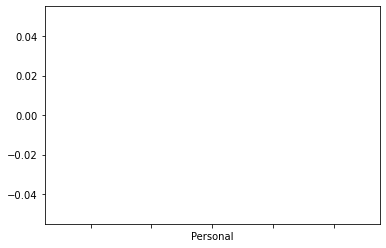

In [83]:
# Calculate rolling standard deviation
std = annualized_new.rolling(21).std()
# Plot rolling standard deviation
std.plot()

### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!